<a href="https://colab.research.google.com/github/marianatiele/Analise-Petrobras/blob/main/Treino_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
dados = pd.read_excel('/content/Base.xlsx')
dados.shape
dados.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
dados.shape

(2485, 7)

In [ ]:
# dados.drop(columns=['Data']).describe()

In [ ]:
dados.head()

,Data,PETR4,Ibovespa,Brent,Selic,Dólar,Investimento
0,2014-01-02,16.750000,50341,107.779999,10.0,2.3571,5025.000000
1,2014-01-03,16.500000,50981,106.889999,10.0,2.3847,4950.000000
2,2014-01-06,16.620001,50974,106.730003,10.0,2.3715,4986.000252
3,2014-01-07,16.160000,50430,107.349998,10.0,2.3737,4847.999954
4,2014-01-08,16.190001,50577,107.150002,10.0,2.3687,4857.000160


In [ ]:
# dados[1248:]

In [ ]:
dados.tail()

,Data,PETR4,Ibovespa,Brent,Selic,Dólar,Investimento
2480,2023-12-22,36.740002,132753,79.070000,11.75,4.881800,11022.000504
2481,2023-12-26,37.330002,133533,81.070000,11.75,4.869744,11199.000549
2482,2023-12-27,37.360001,134194,79.650002,11.75,4.813500,11208.000183
2483,2023-12-28,37.240002,134185,78.389999,11.75,4.826100,11172.000504
2484,2024-01-02,37.779999,132697,75.889999,11.75,4.852400,11333.999634


In [ ]:
# prompt: de dados selecione as ultimas 30 linhas

ultimas_30_linhas = dados.tail(30)
# print(ultimas_30_linhas.shape)


In [ ]:
dados.drop(columns=['Data'], inplace=True)
previsores = dados.iloc[:,0:5]
classe = dados.iloc[:,5]

In [ ]:
# previsores.head()
# classe.head()

In [ ]:
# classe.head()

In [ ]:
previsores.shape, classe.shape

((2485, 5), (2485,))

In [ ]:
valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
valor_real.drop(columns=['Open','High','Low','Adj Close','Volume'], inplace=True)
valor_real['Investimento Real']  = valor_real['Close'] * 300

In [ ]:
valor_real.reset_index(inplace=True)
valor_real.drop(columns=['Close', 'Date'], inplace=True)

In [ ]:
# valor_real.drop(columns=['index'], inplace=True)

In [ ]:
# valor_real

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
valor_real_norm = scaler.fit_transform(valor_real)


In [ ]:
# ultimos_30_dias = dados.iloc[-30:]

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores, classe, train_size=0.65, shuffle=False)

In [ ]:
x_treino.shape, x_teste.shape, y_treino.shape, y_teste.shape

((1615, 5), (870, 5), (1615,), (870,))

In [ ]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0,1))
treino_x_norm = scaler.fit_transform(x_treino)
treino_y_norm = scaler.fit_transform(np.array(y_treino).reshape(-1,1))
teste_x_norm = scaler.fit_transform(x_teste)
teste_y_norm = scaler.fit_transform(np.array(y_teste).reshape(-1,1))

In [ ]:
# y_treino

In [ ]:
# treino_x_norm

In [ ]:
treino_x_norm.shape, treino_y_norm.shape, teste_x_norm.shape, y_teste.shape

((1615, 5), (1615, 1), (870, 5), (870,))

In [ ]:
# x_treino

In [ ]:
# prompt: Cria um gráfico com os dados treino e teste e coloca as datas no eixo X

dados = pd.read_excel('/content/Base.xlsx')
dados.drop(columns = 'Unnamed: 0', inplace = True)
datas = pd.to_datetime(dados['Data'])

# Create traces for training and testing data
trace_treino = go.Scatter(x=datas[:-len(y_teste)], y=y_treino, mode='lines', name='Treino')
trace_teste = go.Scatter(x=datas[-len(y_teste):], y=y_teste, mode='lines', name='Teste')

# Create layout
layout = go.Layout(title='Dados de Treino e Teste', xaxis_title='Data', yaxis_title='Valor')

# Create figure and add traces
fig = go.Figure(data=[trace_treino, trace_teste], layout=layout)

# Display the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
len(treino_x_norm), len(previsores)

(1615, 2485)

In [ ]:
# # Preparar os dados de entrada e saída
# previsoes_dados = []
# valor_real_dados = []

# # Ajuste o loop para considerar previsões para 30 dias
# for i in range(30, len(dados_norm) - 30):
#     previsoes_dados.append(dados_norm[i-30:i, :])  # Usando todos os dados de 30 dias anteriores
#     valor_real_dados.append(valor_real_norm)
#     # valor_real_dados.append(ultimos_30_dias)

# # Converter as listas em arrays NumPy
# previsoes_dados, valor_real_dados = np.array(previsoes_dados), np.array(valor_real_dados)

# # Verifique as formas dos dados preparados
# print(f"Forma de previsoes_dados: {previsoes_dados.shape}")
# print(f"Forma de valor_real_dados: {valor_real_dados.shape}")


In [ ]:
passo_temporal = 30

# Inicialize as listas para os dados de treinamento
X_traino, y_traino = [], []

# Crie as janelas deslizantes para os dados de treinamento
for i in range(passo_temporal, len(treino_x_norm)):
    X_traino.append(treino_x_norm[i-passo_temporal:i])

for i in range(passo_temporal, len(treino_y_norm)):
    y_traino.append(treino_y_norm[i])

# Inicialize as listas para os dados de teste
X_test = []
y_test = []

# Crie as janelas deslizantes para os dados de teste
for i in range(passo_temporal, passo_temporal + len(teste_x_norm) - passo_temporal):
    X_test.append(teste_x_norm[i-passo_temporal:i])

for i in range(passo_temporal, len(teste_y_norm)):
    y_test.append(teste_y_norm[i])

# Converta tudo para matrizes numpy
X_traino = np.array(X_traino)
y_traino = np.array(y_traino).reshape(-1, 1)  # Assegure-se de que y_traino tenha a forma (n_samples, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Verifique as formas das matrizes resultantes
print(X_traino.shape)
print(y_traino.shape)
print(X_test.shape)
print(y_test.shape)

(1585, 30, 5)
(1585, 1)
(840, 30, 5)
(840, 1)


In [ ]:
# dados.head()

In [ ]:
# Treinando a LSTM com Treino e teste

modelo2 = Sequential()
modelo2.add(LSTM(units=100, return_sequences=True, input_shape=(passo_temporal, 5)))
modelo2.add(Dropout(0.3))
modelo2.add(LSTM(units=50, return_sequences=True))
modelo2.add(Dropout(0.3))
modelo2.add(LSTM(units=50, return_sequences=True))
modelo2.add(Dropout(0.3))
modelo2.add(LSTM(units=50, return_sequences=True))
modelo2.add(Dropout(0.3))
modelo2.add(LSTM(units=50))
modelo2.add(Dropout(0.3))
modelo2.add(Dense(units=1, activation='sigmoid'))
modelo2.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
X_traino.shape, y_traino.shape

((1585, 30, 5), (1585, 1))

In [ ]:
modelo2.fit(X_traino,y_traino, epochs=50, batch_size=32, shuffle=False)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.1050
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0199 - mean_absolute_error: 0.1072
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0146 - mean_absolute_error: 0.0957
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0122 - mean_absolute_error: 0.0890
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0111 - mean_absolute_error: 0.0850
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0100 - mean_absolute_error: 0.0802
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0769
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0088 - mean_absolute_error: 0.0751
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0087 - mean_absolute_error: 0.0747
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0084 - mean_absolute_error: 0.0738
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
datas = pd.to_datetime(pd.read_excel('/content/Base.xlsx')['Data'])
quantidade_dados = int(len(datas) * 0.8)
datas  = datas[:quantidade_dados]
# print(datas)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


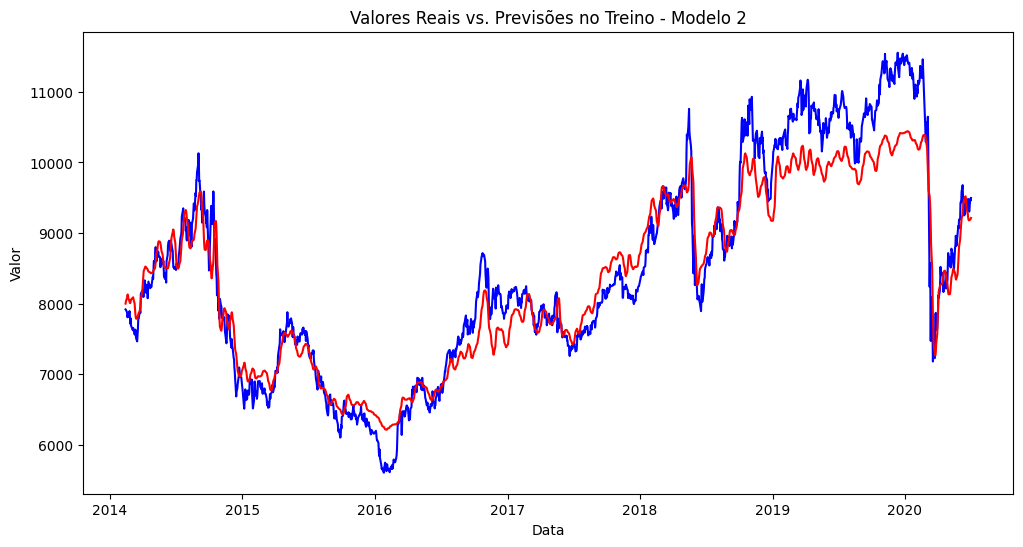

In [ ]:
# Obtenha as previsões do modelo para os dados de treino
y_pred_treino = modelo2.predict(X_traino)

# Inverta a escala dos dados para obter os valores originais
y_pred_treino_inv = scaler.inverse_transform(y_pred_treino)
y_treino_inv = scaler.inverse_transform(y_traino)

# Crie um gráfico para comparar os valores reais e as previsões
plt.figure(figsize=(12, 6))
plt.plot(datas[passo_temporal:passo_temporal+len(y_treino_inv)], y_treino_inv, label='Real', color='blue')
plt.plot(datas[passo_temporal:passo_temporal+len(y_pred_treino_inv)], y_pred_treino_inv, label='Previsão', color='red')
plt.title('Valores Reais vs. Previsões no Treino - Modelo 2')
plt.xlabel('Data')
plt.ylabel('Valor')
# plt.legend()
plt.show()


#Mean_Absolute_Error Treino e teste

In [ ]:
# prompt: faz o mean_abisolut_erro de treino e teste,  quero o valor normalizado não presica inverter

# Calcula o MAE para os dados de treino
mae_treino = mean_absolute_error(y_traino, y_pred_treino)
print('MAE (Treino):', mae_treino)

# Obtenha as previsões do modelo para os dados de teste
y_pred_teste = modelo2.predict(X_test)

# Calcula o MAE para os dados de teste
mae_teste = mean_absolute_error(y_test, y_pred_teste)
print('MAE (Teste):', mae_teste)


MAE (Treino): 0.05860833504730649
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MAE (Teste): 0.10864386062927076


In [ ]:
0.1119 *100


11.19

In [ ]:
# Fazendo as previsões
previsao = modelo2.predict(X_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


#Usando os últimos dias de teste e próximos 30 dias

In [ ]:
valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16')
valor_real.drop(columns=['Open','High','Low','Adj Close','Volume'], inplace=True)
valor_real.reset_index(inplace=True)
valor_real['Investimento Real']  = valor_real['Close'] * 300
valor_real.drop(columns=['Close', 'Date'], inplace=True)
valor_real.count()

[*********************100%%**********************]  1 of 1 completed


,0
Investimento Real,30


In [ ]:
# Pegando os últimos 30 dias de X_test
ultimos_30_dias = X_test[-30:]

# Fazendo a previsão para os próximos 30 dias
previsao_30_dias = modelo2.predict(ultimos_30_dias)
previsao_30_dias_real = scaler.inverse_transform(previsao_30_dias)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [ ]:
previsao_30_dias_real = pd.DataFrame(previsao_30_dias_real)
# previsao_30_dias_real.to_excel('previsao_30_dias_a.xlsx')

In [ ]:
previsao.shape, y_test.shape

((840, 1), (840, 1))

In [ ]:
previsao_30_dias.shape, valor_real.shape

((30, 1), (30, 1))

In [ ]:
previsao_30_dias = scaler.inverse_transform(previsao_30_dias)
previsao_30_dias = pd.DataFrame(previsao_30_dias)
previsao_30_dias.columns = ['Previsão']

In [ ]:
valor_real.count()

,0
Investimento Real,30


In [ ]:
# previsao_30_dias.head()
previsao_30_dias = pd.DataFrame(previsao_30_dias)
# previsao_30_dias.to_excel('previsao_30_dias.xlsx')

In [ ]:
valor_real.tail()

,Investimento Real
25,12660.000229
26,12558.000183
27,12389.999771
28,12297.000504
29,12689.999771


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


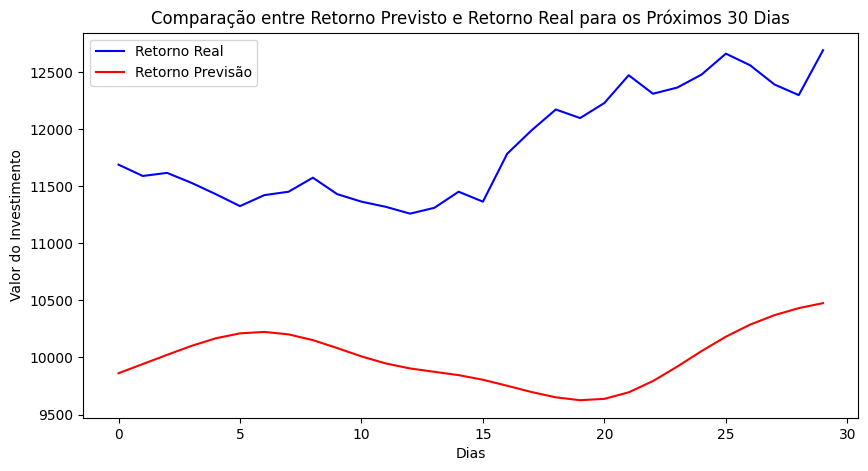

In [ ]:

# Pegando os últimos 30 dias de X_test
ultimos_30_dias = X_test[-30:]

# Fazendo a previsão para os próximos 30 dias
previsao_30_dias = modelo2.predict(ultimos_30_dias)
previsao_30_dias_real = scaler.inverse_transform(previsao_30_dias)

# Criando um DataFrame para a previsão
previsao_30_dias_df = pd.DataFrame(previsao_30_dias_real, columns=['Previsão'])

# Ajustando o índice do DataFrame valor_real para corresponder aos dias da previsão
valor_real = valor_real.iloc[-30:].reset_index(drop=True)

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(valor_real['Investimento Real'], label='Retorno Real', color='blue')
plt.plot(previsao_30_dias_df['Previsão'], label='Retorno Previsão', color='red')
plt.title('Comparação entre Retorno Previsto e Retorno Real para os Próximos 30 Dias')
plt.xlabel('Dias')
plt.ylabel('Valor do Investimento')
plt.legend()
plt.show()


In [ ]:
# Normalizando os dados reais com o mesmo scaler usado nos dados de treinamento
valor_real_norm = scaler.transform(valor_real)

# Calculando o erro absoluto médio
mae = mean_absolute_error(valor_real_norm, previsao_30_dias)

print("Erro Absoluto Médio (MAE):", mae)


Erro Absoluto Médio (MAE): 0.3116749854833809


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning:

X has feature names, but MinMaxScaler was fitted without feature names



In [ ]:
# Pegando os últimos 30 dias de X_test e valor_real
ultimos_30_dias_x = X_test[-30:]
ultimos_30_dias_valor_real = valor_real_norm[-30:]

# Fazendo a previsão para os últimos 30 dias
previsao_ultimos_30_dias = modelo2.predict(ultimos_30_dias_x)

# Calculando o erro absoluto médio
mae_ultimos_30_dias = mean_absolute_error(ultimos_30_dias_valor_real, previsao_ultimos_30_dias)

print("Erro Absoluto Médio (MAE) dos últimos 30 dias:", mae_ultimos_30_dias)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Erro Absoluto Médio (MAE) dos últimos 30 dias: 0.3116749854833809


In [ ]:
0.22037459929296646 * 100

22.037459929296645

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[*********************100%%**********************]  1 of 1 completed


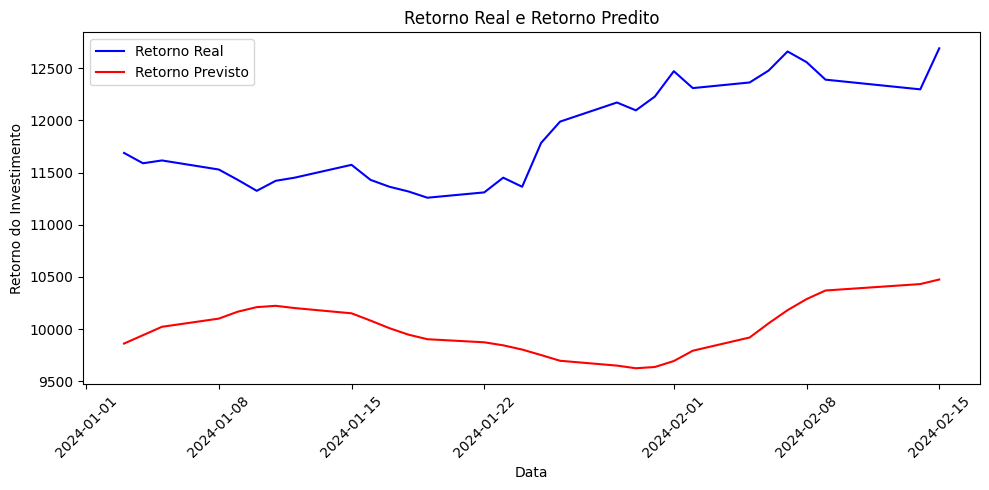

In [ ]:
# Pegando os últimos 30 dias de X_test
ultimos_30_dias = X_test[-30:]

# Fazendo a previsão para os próximos 30 dias
previsao_30_dias = modelo2.predict(ultimos_30_dias)
previsao_30_dias_real = scaler.inverse_transform(previsao_30_dias)

# Criando um DataFrame para a previsão
previsao_30_dias_df = pd.DataFrame(previsao_30_dias_real, columns=['Previsão'])

# Ajustando o índice do DataFrame valor_real para corresponder aos dias da previsão
valor_real = valor_real.iloc[-30:].reset_index(drop=True)

# Obtendo as datas correspondentes aos últimos 30 dias de valor_real
datas_valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16').index[-30:]

# Criando o gráfico
plt.figure(figsize=(10, 5))
plt.plot(datas_valor_real, valor_real['Investimento Real'], label='Retorno Real', color='blue')
plt.plot(datas_valor_real, previsao_30_dias_df['Previsão'], label='Retorno Previsto', color='red')
plt.title('Retorno Real e Retorno Predito')
plt.xlabel('Data')
plt.ylabel('Retorno do Investimento')
plt.xticks(rotation=45)  # Rotaciona as datas no eixo x para melhor visualização
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[*********************100%%**********************]  1 of 1 completed


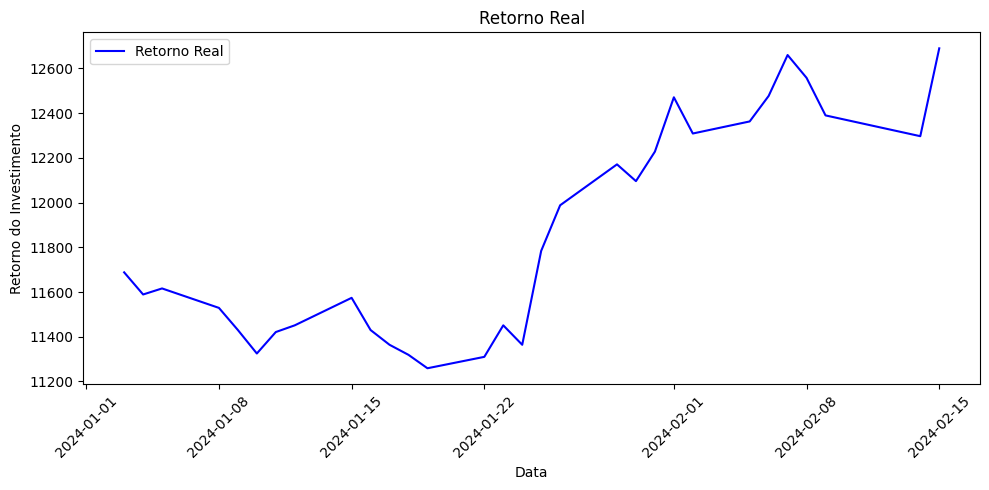

In [ ]:
# Pegando os últimos 30 dias de X_test
ultimos_30_dias = X_test[-30:]

# Fazendo a previsão para os próximos 30 dias
previsao_30_dias = modelo2.predict(ultimos_30_dias)
previsao_30_dias_real = scaler.inverse_transform(previsao_30_dias)

# Criando um DataFrame para a previsão
previsao_30_dias_df = pd.DataFrame(previsao_30_dias_real, columns=['Previsão'])

# Ajustando o índice do DataFrame valor_real para corresponder aos dias da previsão
valor_real = valor_real.iloc[-30:].reset_index(drop=True)

# Obtendo as datas correspondentes aos últimos 30 dias de valor_real
datas_valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16').index[-30:]

# Criando o gráfico
plt.figure(figsize=(10, 5))
# plt.plot(datas_valor_real, previsao_30_dias_df['Previsão'], label='Previsão', color='blue')
plt.plot(datas_valor_real, valor_real['Investimento Real'], label='Retorno Real', color='blue')
plt.title('Retorno Real')
plt.xlabel('Data')
plt.ylabel('Retorno do Investimento')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Normalizando os dados
scaler_real = MinMaxScaler(feature_range=(0,1))
valor_real_norm = scaler_real.fit_transform(valor_real)

scaler_previsao = MinMaxScaler(feature_range=(0,1))
previsao_30_dias_norm = scaler_previsao.fit_transform(previsao_30_dias_df)

# Calculando o erro absoluto médio
mae = mean_absolute_error(valor_real_norm, previsao_30_dias_norm)
print("Erro Absoluto Médio (MAE):", mae)


Erro Absoluto Médio (MAE): 0.3585428554632971


In [ ]:
p = scaler.inverse_transform(previsao)

In [ ]:
p = pd.DataFrame(p)

p = p.reset_index(drop=True)
p.shape

(840, 1)

In [ ]:
# d = pd.read_excel('/content/Base.xlsx')
# _, x_teste,_, y_teste = train_test_split(d, d, test_size=0.3, shuffle=False)


# data = x_teste['Data']
# data = pd.DataFrame(data)
# data.columns = ['Data']
# data = data.reset_index(drop=True)
# data.head()

In [ ]:
# p.count(), data.count()

In [ ]:
# dados_preditos = pd.concat([data, p], axis=1)
# dados_preditos.head()


In [ ]:
# dados_preditos.tail()

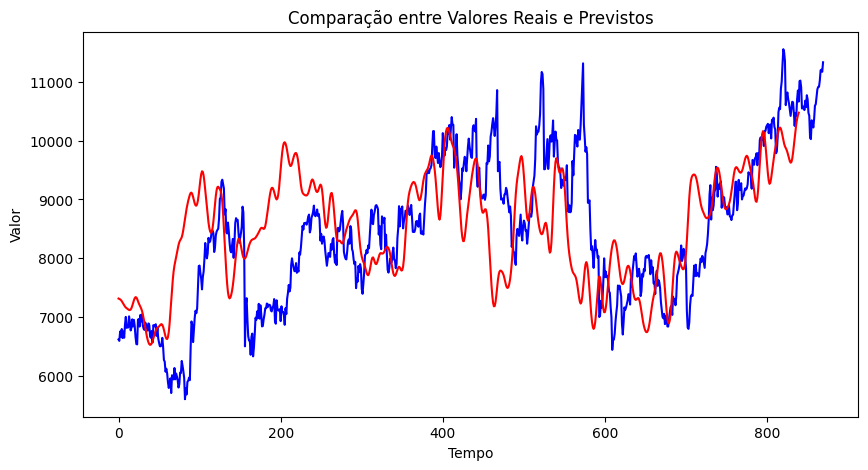

In [ ]:
y_teste = scaler.inverse_transform(teste_y_norm)
y_teste = pd.DataFrame(y_teste)
y_teste.columns = ['Real']

# Plotando os valores reais e previstos
plt.figure(figsize=(10,5))
plt.plot(y_teste, label='Valor Real', color='blue')
plt.plot(p, label='Valor Previsto', color='red')
plt.title('Comparação entre Valores Reais e Previstos')
plt.xlabel('Tempo')
plt.ylabel('Valor')
# plt.legend()
plt.show()

In [ ]:
# ultimos_30_dias = dados.tail(30)
# print(ultimos_30_dias.shape)


In [ ]:
valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16')

# valor_real.count()

[*********************100%%**********************]  1 of 1 completed


In [ ]:
valor_real = yf.download('PETR4.SA', start='2024-01-03', end='2024-02-16')
valor_real.drop(columns=['Open','High','Low','Adj Close','Volume'], inplace=True)
valor_real.reset_index(inplace=True)
valor_real['Investimento Real']  = valor_real['Close'] * 300
x = valor_real.drop(columns=['Close', 'Date'], inplace=True)
# x

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# mean_absolute_error(previsao, y_test) * 100

In [ ]:
# valor_real_norm = escalar.transform(x)
# # valor_real_norm

In [ ]:
x = X_test[:-30]
x.shape

(810, 30, 5)

In [ ]:
ultimos_30_dias = X_test[-30:]
print(ultimos_30_dias.shape)


(30, 30, 5)


In [ ]:
previsao_30 = modelo2.predict(ultimos_30_dias)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
predito_reverse = scaler.inverse_transform(previsao_30)

In [ ]:
predito_reverse.shape, valor_real.shape

((30, 1), (30, 1))

In [ ]:
predito_reverse = pd.DataFrame(predito_reverse)
# predito_reverse